In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import random

### Importando dados

In [2]:
df = pd.read_csv('dataset/age_gender.csv', usecols = ['age', 'ethnicity', 'gender', 'pixels'])
print('shape:', df.shape)
df.head()

shape: (23705, 4)


,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
y_category = 'gender'

In [4]:
x = list(df['pixels'].map(lambda line: list(map(lambda pixel: int(pixel), line.split(' ')))))
y = list(df[y_category])

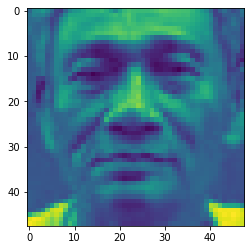

In [6]:
example_image = np.reshape(x[random.randint(0, df.shape[0])], (48, 48))
plt.imshow(example_image)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('Train size:', len(y_train))
print('Test size:', len(y_test))

Train size: 18964
Test size: 4741


In [11]:
ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(16)).fit(x_train, y_train)

C:\Users\marce\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_ANN = ANN.predict(x_test)

print('acc: ', accuracy_score(y_test, y_pred_ANN) * 100, '%')
confusion_matrix(y_test, y_pred_ANN)

acc:  79.6245517823244 %


array([[1965,  503],
       [ 463, 1810]], dtype=int64)